In [1]:
import Pkg
Pkg.activate()

  Activating project at `~/.julia/environments/v1.11`


In [4]:
Pkg.add(["Plots", "StatsBase", "Distributions", "LaTeXStrings"])

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.11/Project.toml`
  [31c24e10] + Distributions v0.25.122
  [b964fa9f] + LaTeXStrings v1.4.0
  [2913bbd2] + StatsBase v0.34.6
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


In [5]:
using Plots, StatsBase, Distributions, LaTeXStrings

In [6]:
# change of variable
g(y) = log(y) - log(1 - y) + 5

g (generic function with 1 method)

In [7]:
g_inv(x) = 1 / (1 + exp(-x + 5)) # this is a logistic sigmoid function

g_inv (generic function with 1 method)

In [8]:
xs = 0.0:0.01:10.0

0.0:0.01:10.0

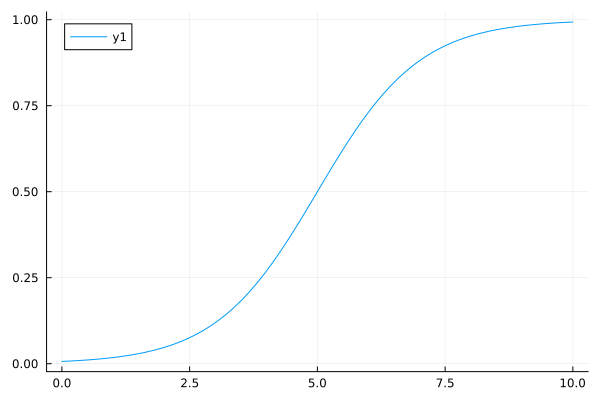

In [9]:
plot(xs, g_inv.(xs))

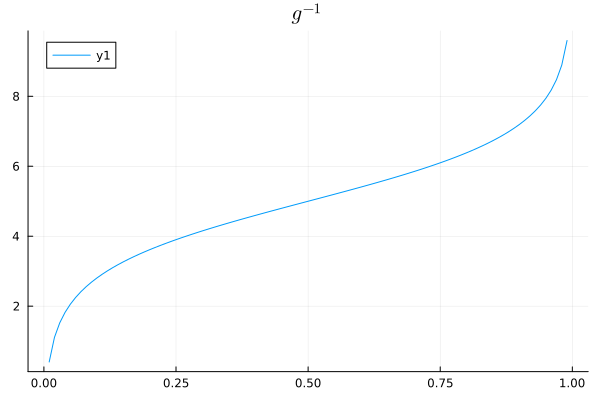

In [10]:
plot(0.0:0.01:1.0, @.( log(xs) - log(max(1 - xs, 0.0)) + 5), title=L"g^{-1}")

In [11]:
normal = Normal(7, 1.0)

Normal{Float64}(μ=7.0, σ=1.0)

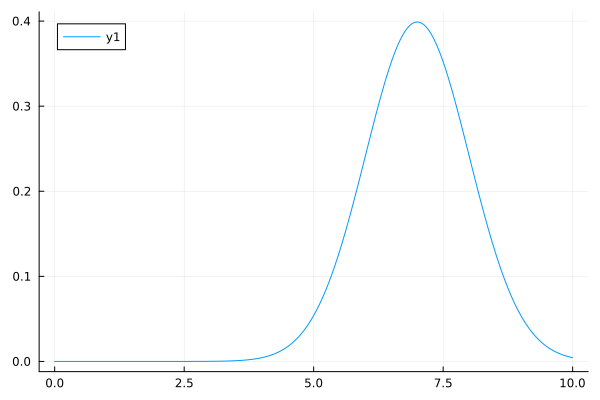

In [12]:
plot(xs, pdf.(normal, xs))

In [13]:
const SAMPLE_SIZE = 50000
smpl = rand(normal, SAMPLE_SIZE)

50000-element Vector{Float64}:
 6.630240680360174
 6.521137200786853
 6.073503509300197
 6.794477391091418
 5.635816042737055
 6.615345715674513
 7.987156988075106
 5.514982469330403
 6.349629607179513
 6.957231956707975
 9.510427501974588
 6.018783483644746
 6.9644059883428815
 ⋮
 6.891921649162249
 7.322261508469041
 6.451955285454395
 7.0393984387594495
 7.87176003590817
 7.998358839062547
 5.495626216110587
 6.716784954840101
 6.464940476656996
 5.799872204047452
 7.121897588253397
 6.715783801718835

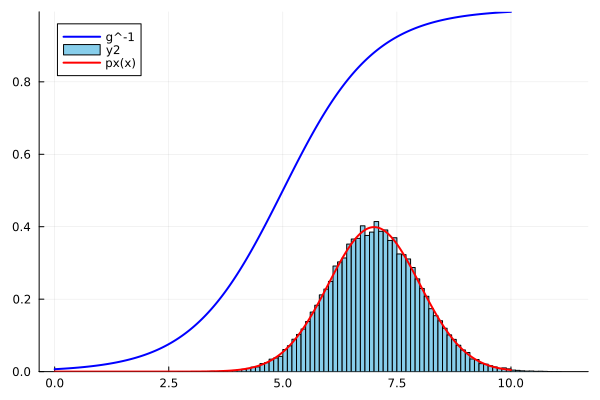

In [14]:
plot(xs, g_inv.(xs), label="g^-1", color=:blue, linewidth=2)

# histogram!(smpl ./ sum(smpl))
histogram!(smpl, normalize=true, color=:skyblue)
p_x(x) = pdf(normal, x)
ys = p_x.(xs)
plot!(xs, ys, label="px(x)", color=:red, linewidth=2)



In this example, the `pdf` of the $p_x(x)$ is Normal Bell curve. As a function, it's

$$  f(x; \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}}
\exp \left( - \frac{(x - \mu)^2}{2 \sigma^2} \right)
$$

As in our example, the $\sigma^2=1$, hence:

$$ f(x; \mu) = \frac{1}{\sqrt{2 \pi}}
\exp \left( - \frac{(x - \mu)^2}{2} \right)
$$

Now we change the variables


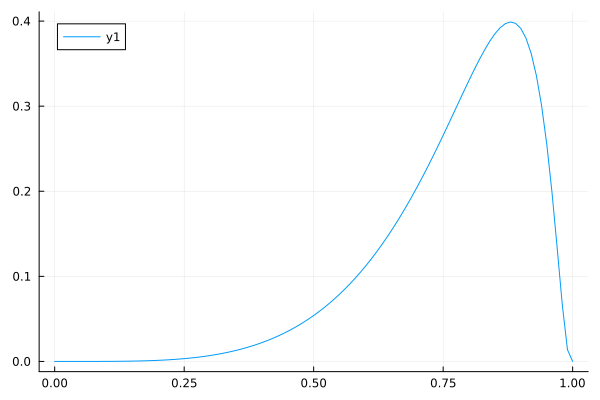

In [15]:
# Transformation
p_x_transformed_as_function = p_x ∘ g

let
    xs = 0.0:0.01:1.0
    plot(xs, p_x_transformed_as_function.(xs))
end

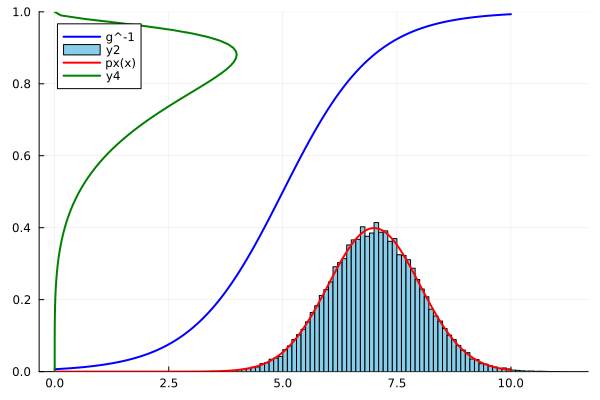

In [16]:
plot(xs, g_inv.(xs), label="g^-1", color=:blue, linewidth=2)

# histogram!(smpl ./ sum(smpl))
histogram!(smpl, normalize=true, color=:skyblue)
p_x(x) = pdf(normal, x)
ys = p_x.(xs)
plot!(xs, ys, label="px(x)", color=:red, linewidth=2)

yr = 0.0:0.01:1.0
xr = p_x_transformed_as_function.(yr)

plot!(xr .* 10, yr, color=:green, linewidth=2)




## Change of variable for `pdf`s

$$ p_y(y) = p_x(x) | \frac{dx}{dy} | = p_x(g(y)) * | \frac{dg}{dy} | $$

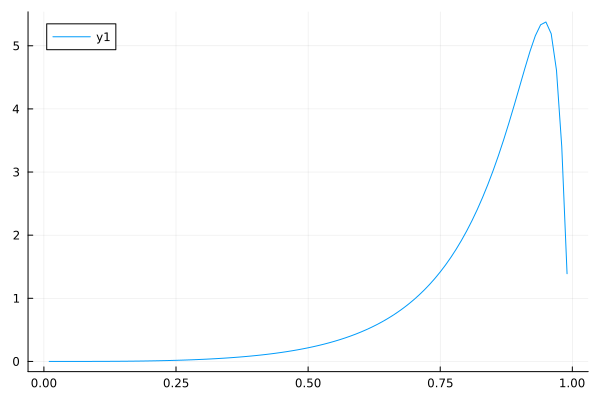

In [17]:
dgdy(y) = 1/y + 1/(1-y)
p_y(y) = (p_x ∘ g)(y) * (abs ∘ dgdy)(y)

let
    ys = 0.0:0.01:1.0
    plot(ys, p_y.(ys))
end

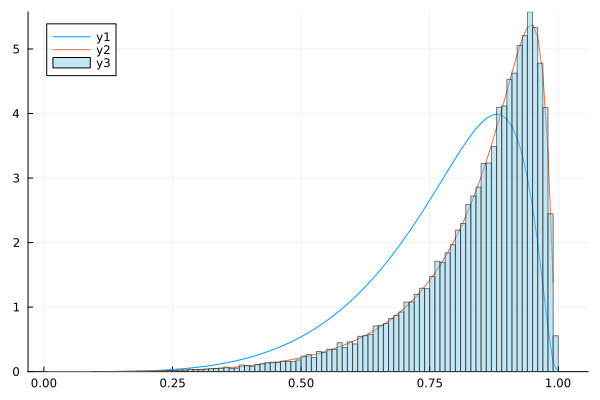

In [18]:
let
    xs = 0.0:0.01:1.0
    plot(xs, 10 .* p_x_transformed_as_function.(xs))
    plot!(xs, p_y.(xs))

    ysmpl = g_inv.(smpl)
    histogram!(ysmpl, normalize=true, color=:skyblue, alpha=0.5)
end

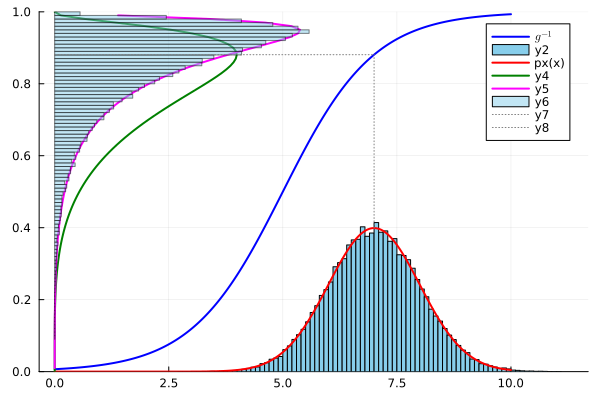

In [19]:
plot(xs, g_inv.(xs), label=L"g^{-1}", color=:blue, linewidth=2)

# histogram!(smpl ./ sum(smpl))
histogram!(smpl, normalize=true, color=:skyblue)
p_x(x) = pdf(normal, x)
ys = p_x.(xs)
plot!(xs, ys, label="px(x)", color=:red, linewidth=2)

yr = 0.0:0.01:1.0
xr = p_x_transformed_as_function.(yr)

const NORMALIZATION = 10
plot!(xr .* NORMALIZATION, yr, color=:green, linewidth=2)

xr_2 = p_y.(yr)
plot!(xr_2, yr, color=:magenta, linewidth=2)

# ysmpl = g_inv.(smpl)
# histogram!(ysmpl, normalize=true, color=:skyblue, alpha=0.5)

ysmpl = g_inv.(smpl)
histogram!(ysmpl, normalize=true, color=:skyblue, alpha=0.5, orientation=:horizontal, ylims=(0.,1.))

xval = 7.0
yval = g_inv(xval)

# plot!([ xval], [yval, yref], linestyle=:dot, color=:gray)
plot!([xval, xval], [p_x(xval), yval], linestyle=:dot, color=:gray)
plot!([0., xval], [yval, yval], linestyle=:dot, color=:gray)
# bar!(ysmpl, normalize=true, color=:skyblue, alpha=0.5)

# savefig("chap2-transform-density.png")

In [20]:
g_inv(7.0)

0.8807970779778823

In [21]:
a = isnan.(xr_2)
a = broadcast(a) do x
    !x
end
maximum(xr_2[a])

5.376859899922255

## Reflection by `y=x` line

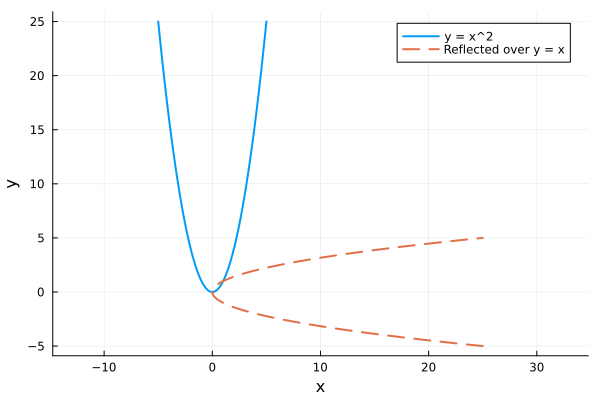

In [ ]:
let
    # Original function
    x = -5:0.1:5
    y = x .^ 2

    # Reflection over y = x → swap x and y
    xr = y
    yr = x

    # Plot both
    plot(x, y, label = "y = x^2", lw=2)
    plot!(xr, yr, label = "Reflected over y = x", lw=2, linestyle=:dash)
    plot!(xlabel = "x", ylabel = "y", legend = :topright, aspect_ratio = :equal)
end

## Multivariate distribution